In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pynamicalsys import ContinuousDynamicalSystem as cds, PlotStyler

In [21]:
ds = cds(model="lorenz system")

In [22]:
parameters = [16, 45.92, 4]  # From A. Wolf et al. / Determining Lyapunov exponents from a time series

In [23]:
total_time = 1000
transient_time = 500
u = [1, 1, 1]

In [24]:
ds.integrator("rk4", time_step=0.01)
ds.SALI(u, total_time, parameters=parameters, transient_time=transient_time)

array([520.22,   0.  ])

In [25]:
ds.integrator("rk4", time_step=0.01)
ds.SALI(u, total_time, parameters=parameters, transient_time=transient_time)

array([520.22,   0.  ])

In [26]:
ds.integrator("rk45", atol=1e-8, rtol=1e-6)
ds.SALI(u, total_time, parameters=parameters, transient_time=transient_time)

array([5.22391739e+02, 5.55111512e-17])

In [27]:
ds.integrator("rk4", time_step=0.01)
history = ds.SALI(u, total_time, parameters=parameters, transient_time=transient_time, return_history=True)

In [28]:
ds.integrator("rk45", atol=1e-8, rtol=1e-6)
history_rk45 = ds.SALI(u, total_time, parameters=parameters, transient_time=transient_time, return_history=True)

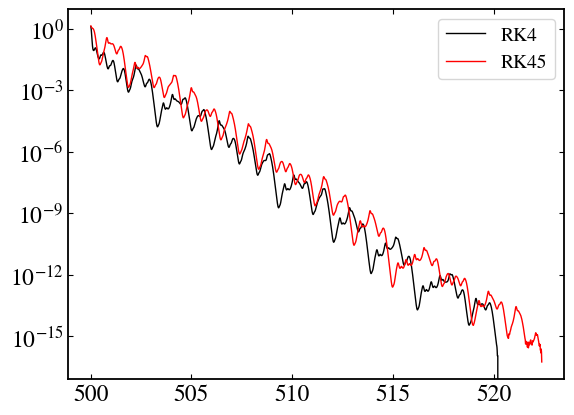

In [29]:
ps = PlotStyler()
ps.apply_style()
plt.plot(history[:, 0], history[:, 1], "k", label="RK4")
plt.plot(history_rk45[:, 0], history_rk45[:, 1], "r", label="RK45")
plt.legend()
plt.yscale("log")

In [30]:
ds.integrator("rk4", time_step=0.01)
history_LDI2 = ds.LDI(u, total_time, 2, parameters=parameters, transient_time=transient_time, return_history=True)
history_LDI3 = ds.LDI(u, total_time, 3, parameters=parameters, transient_time=transient_time, return_history=True)

In [31]:
ds.integrator("rk45", atol=1e-8, rtol=1e-6)
history_LDI2_rk45 = ds.LDI(u, total_time, 2, parameters=parameters, transient_time=transient_time, return_history=True)
history_LDI3_rk45 = ds.LDI(u, total_time, 3, parameters=parameters, transient_time=transient_time, return_history=True)

<Figure size 640x480 with 0 Axes>

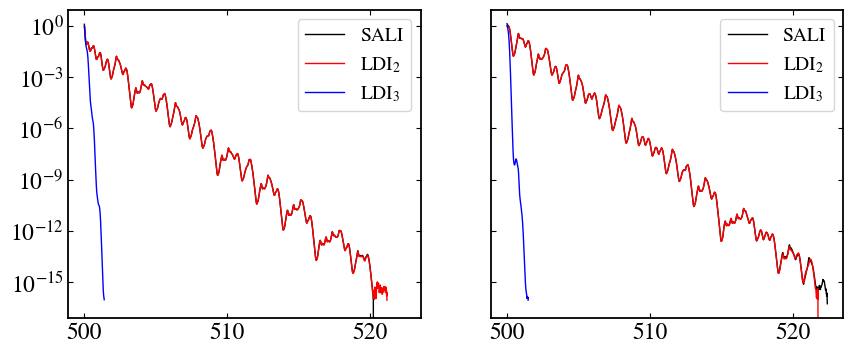

In [32]:
ps = PlotStyler()
ps.apply_style()
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 4))
ax[0].plot(history[:, 0], history[:, 1], "k", label="SALI")
ax[0].plot(history_LDI2[:, 0], history_LDI2[:, 1], "r", label="LDI$_2$")
ax[0].plot(history_LDI3[:, 0], history_LDI3[:, 1], "b", label="LDI$_3$")

ax[1].plot(history_rk45[:, 0], history_rk45[:, 1], "k", label="SALI")
ax[1].plot(history_LDI2_rk45[:, 0], history_LDI2_rk45[:, 1], "r", label="LDI$_2$")
ax[1].plot(history_LDI3_rk45[:, 0], history_LDI3_rk45[:, 1], "b", label="LDI$_3$")

ax[0].legend()
ax[1].legend()
plt.yscale("log")